C:\Users\86185\AppData\Local\Temp\ipykernel_12436\969798608.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stroke_cleaned['bmi'].fillna(bmi_median, inplace=True)


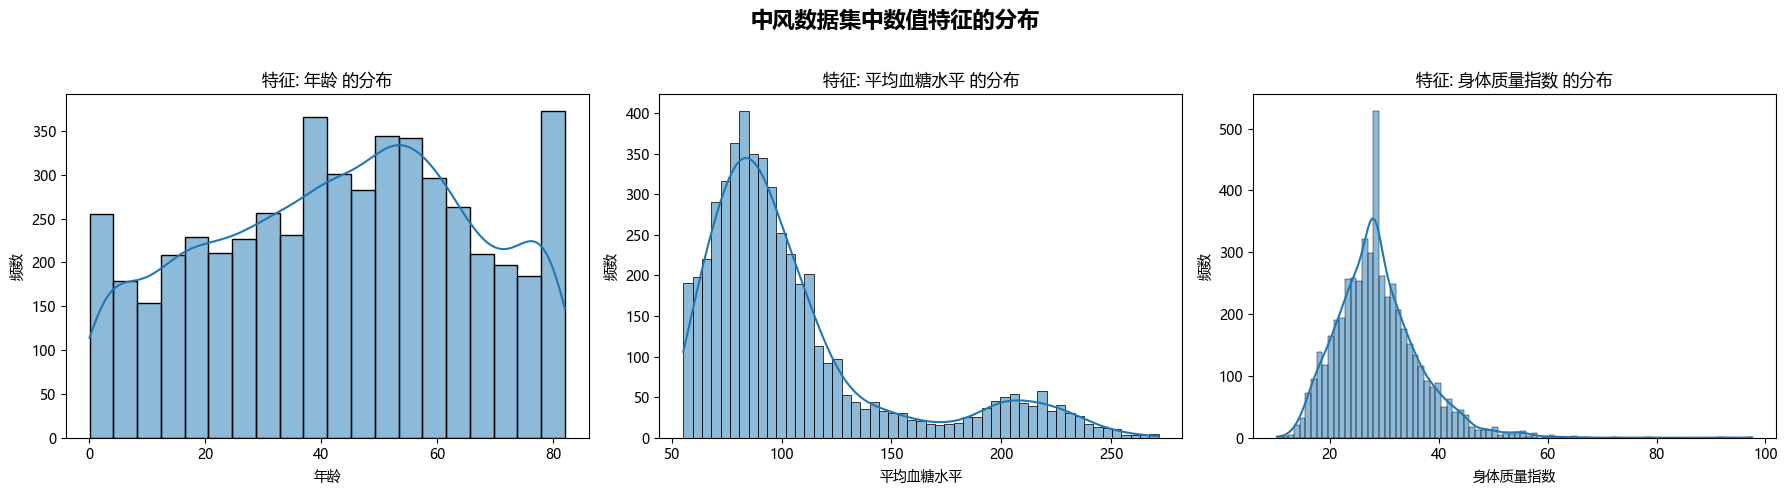

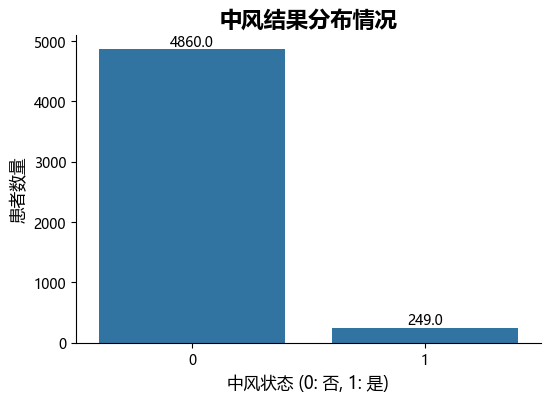

C:\Users\86185\AppData\Local\Temp\ipykernel_12436\969798608.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df_stroke_processed, ax=axes[i], palette="pastel")
C:\Users\86185\AppData\Local\Temp\ipykernel_12436\969798608.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df_stroke_processed, ax=axes[i], palette="pastel")
C:\Users\86185\AppData\Local\Temp\ipykernel_12436\969798608.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df_stroke_processed, a

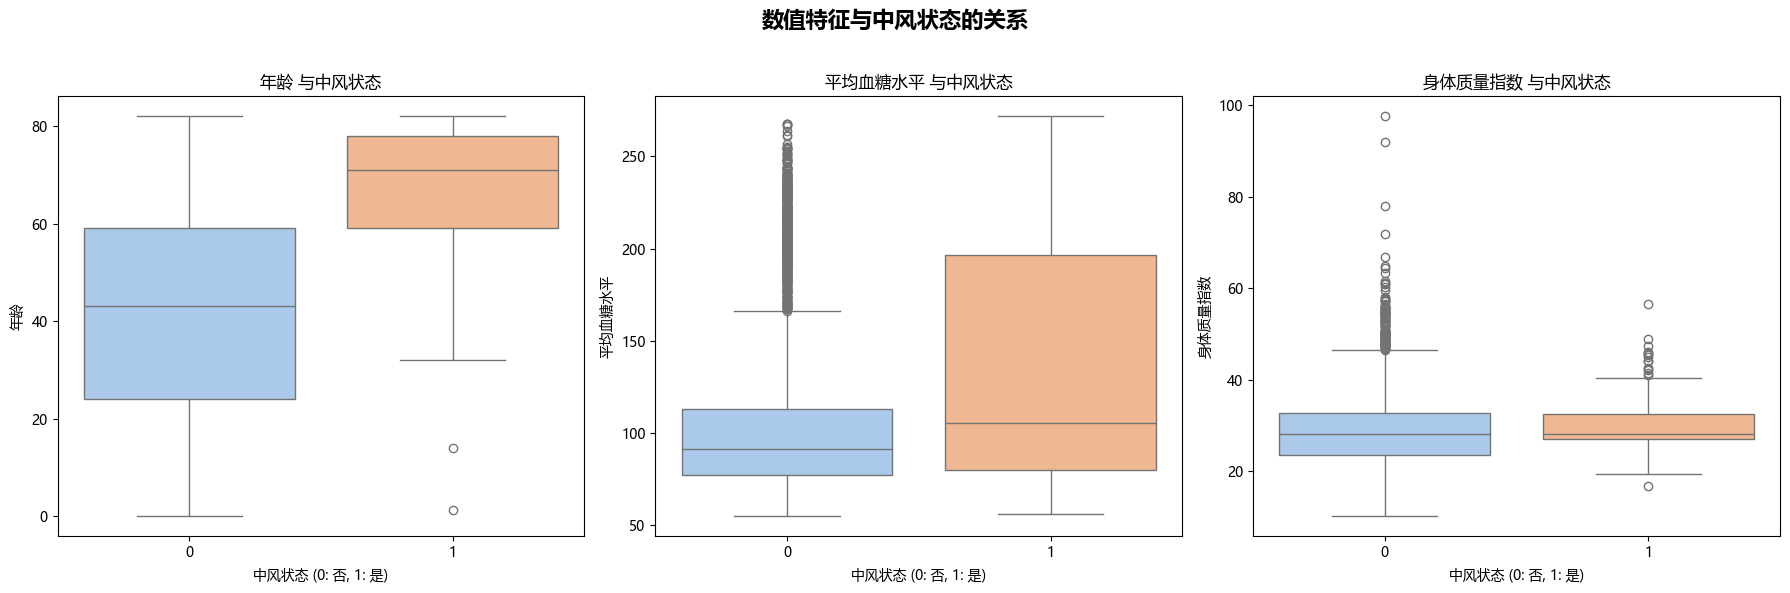

C:\Users\86185\AppData\Local\Temp\ipykernel_12436\969798608.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stroke_rate.index, y=stroke_rate.values, ax=axes[i], palette='viridis')
C:\Users\86185\AppData\Local\Temp\ipykernel_12436\969798608.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, horizontalalignment='right')
C:\Users\86185\AppData\Local\Temp\ipykernel_12436\969798608.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stroke_rate.index, y=stroke_rate.values, ax=axes[i], palette='viridis')
C:\Users\86185\AppData\Local\Temp\

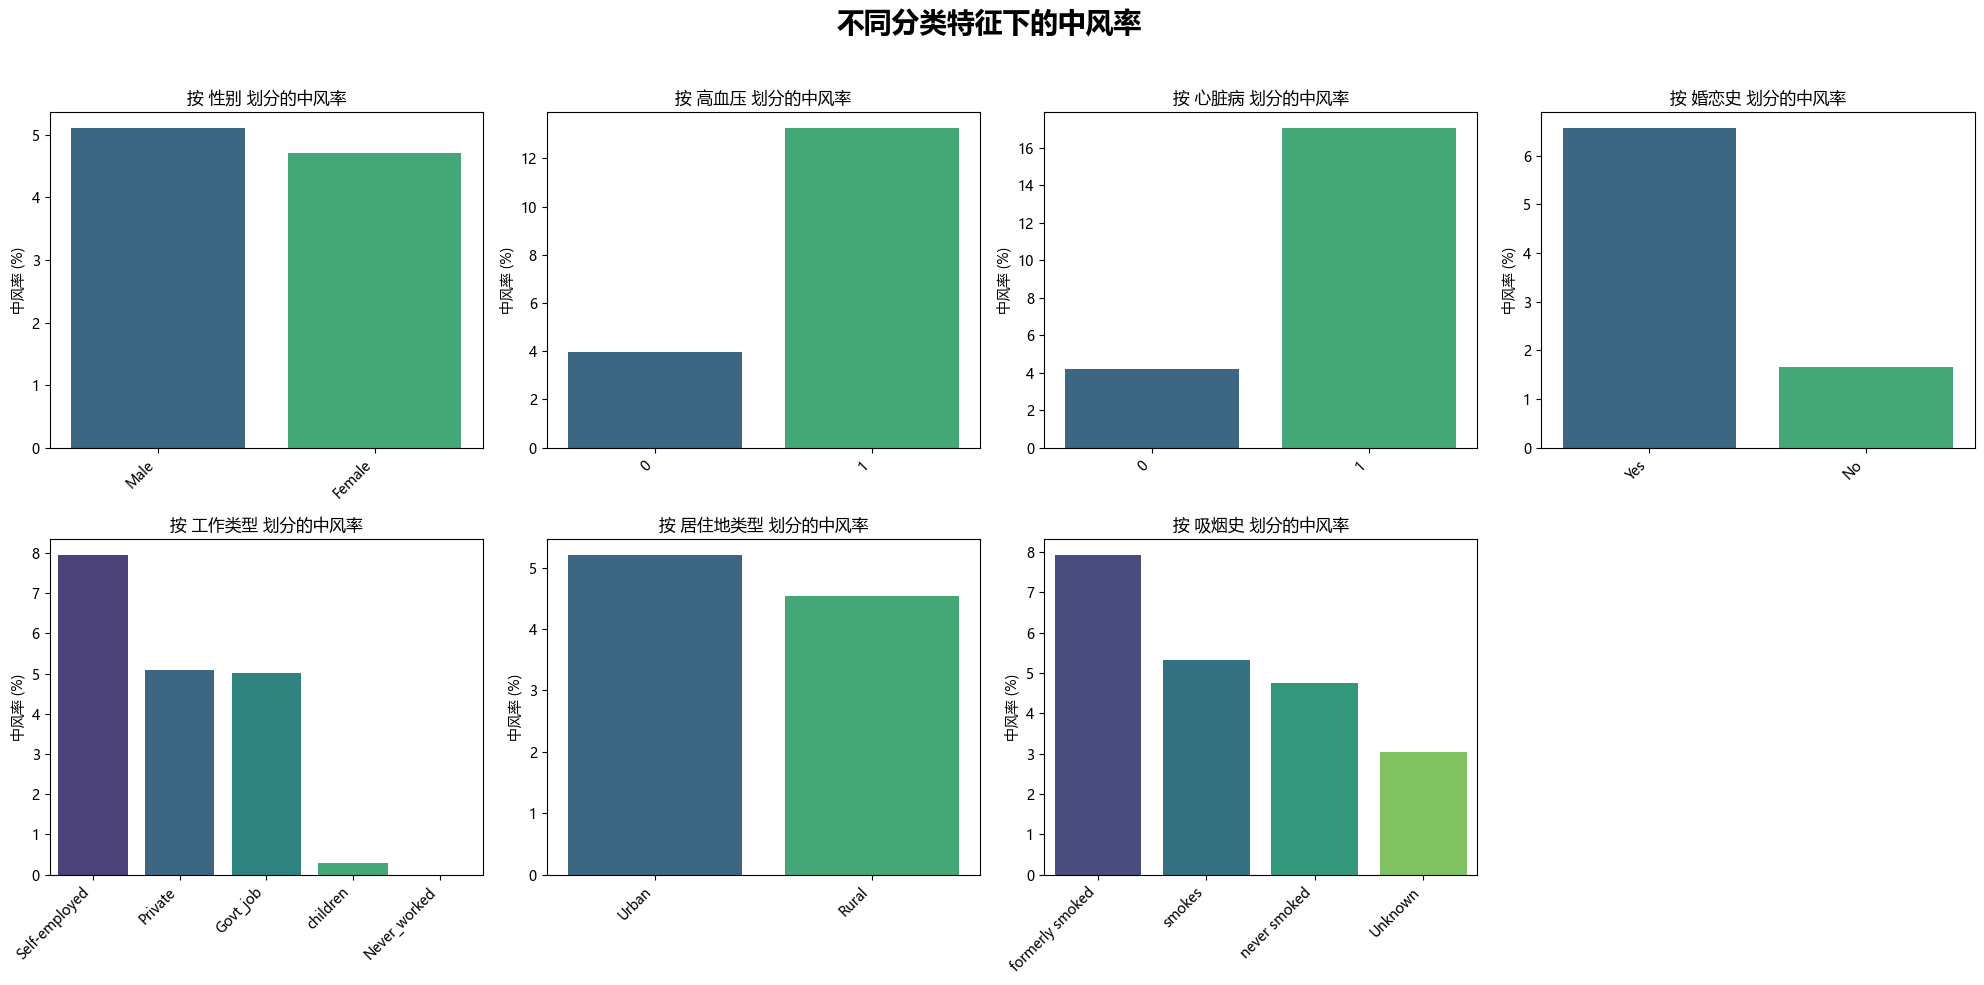

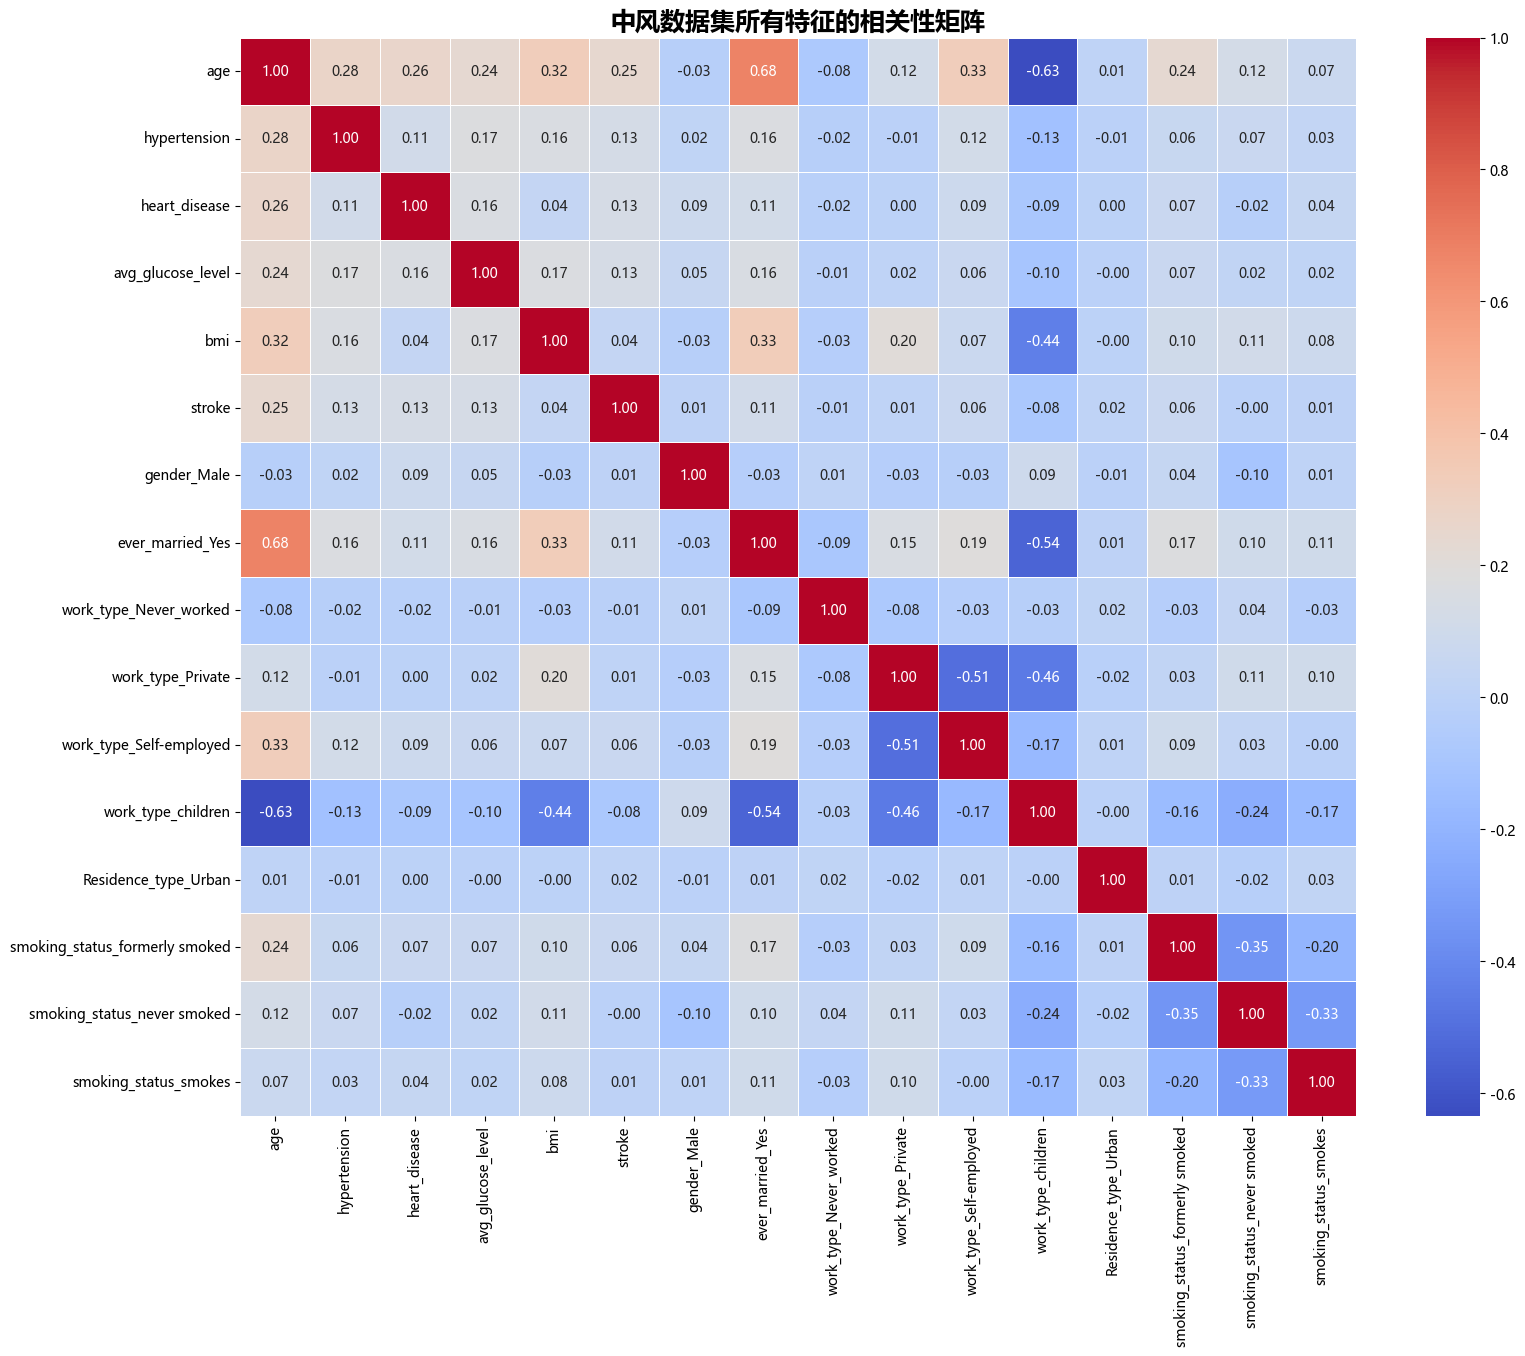

In [1]:
# ==============================================================================
# 0. 导入库与设置环境
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# --- 中文字体设置 ---
try:
    if sys.platform.startswith('win'):
        plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    elif sys.platform.startswith('darwin'):
        plt.rcParams['font.sans-serif'] = ['PingFang SC']
    elif sys.platform.startswith('linux'):
        plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
    else:
        print("未知的操作系统，请手动设置中文字体")
    plt.rcParams['axes.unicode_minus'] = False
except Exception as e:
    pass

# ==============================================================================
# 1. 数据预处理
# ==============================================================================
data_loaded_successfully = False
try:
    df_stroke = pd.read_csv('../data/stroke.csv')
    
    df_stroke_cleaned = df_stroke.copy()
    df_stroke_cleaned = df_stroke_cleaned[df_stroke_cleaned['gender'] != 'Other']
    df_stroke_cleaned = df_stroke_cleaned.drop('id', axis=1)
    bmi_median = df_stroke_cleaned['bmi'].median()
    df_stroke_cleaned['bmi'].fillna(bmi_median, inplace=True)
    
    categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    df_stroke_processed = pd.get_dummies(df_stroke_cleaned, columns=categorical_cols, drop_first=True)
    
    data_loaded_successfully = True

except FileNotFoundError:
    print("错误: 文件 'data/stroke.csv' 未找到。请确认文件路径正确且Jupyter Notebook的工作目录无误。")
except Exception as e:
    print(f"处理过程中出现错误: {e}")

# ==============================================================================
# 2. 探索性数据分析 (EDA)
# ==============================================================================
if data_loaded_successfully:
    
    # --- 准备中文标签 ---
    numerical_features_cn = {'age': '年龄', 'avg_glucose_level': '平均血糖水平', 'bmi': '身体质量指数'}
    col_names_cn = {'gender': '性别', 'hypertension': '高血压', 'heart_disease': '心脏病', 'ever_married': '婚恋史', 'work_type': '工作类型', 'Residence_type': '居住地类型', 'smoking_status': '吸烟史'}

    # --- (1) 单变量分析 ---
    numerical_features = ['age', 'avg_glucose_level', 'bmi']
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('中风数据集中数值特征的分布', fontsize=16, fontweight='bold')
    for i, feature in enumerate(numerical_features):
        sns.histplot(df_stroke_processed[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'特征: {numerical_features_cn.get(feature, feature)} 的分布', fontsize=12)
        axes[i].set_xlabel(numerical_features_cn.get(feature, feature), fontsize=10)
        axes[i].set_ylabel('频数', fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x='stroke', data=df_stroke_processed)
    plt.title('中风结果分布情况', fontsize=16, fontweight='bold')
    plt.xlabel('中风状态 (0: 否, 1: 是)', fontsize=12)
    plt.ylabel('患者数量', fontsize=12)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    sns.despine()
    plt.show()

    # --- (2) 双变量分析 ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('数值特征与中风状态的关系', fontsize=16, fontweight='bold')
    for i, feature in enumerate(numerical_features):
        sns.boxplot(x='stroke', y=feature, data=df_stroke_processed, ax=axes[i], palette="pastel")
        axes[i].set_title(f'{numerical_features_cn.get(feature, feature)} 与中风状态', fontsize=12)
        axes[i].set_xlabel('中风状态 (0: 否, 1: 是)', fontsize=10)
        axes[i].set_ylabel(numerical_features_cn.get(feature, feature), fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    original_categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    fig.suptitle('不同分类特征下的中风率', fontsize=20, fontweight='bold')
    for i, col in enumerate(original_categorical_cols):
        stroke_rate = df_stroke_cleaned.groupby(col)['stroke'].mean().sort_values(ascending=False) * 100
        sns.barplot(x=stroke_rate.index, y=stroke_rate.values, ax=axes[i], palette='viridis')
        axes[i].set_title(f'按 {col_names_cn.get(col, col)} 划分的中风率', fontsize=12)
        axes[i].set_ylabel('中风率 (%)', fontsize=10)
        axes[i].set_xlabel('')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, horizontalalignment='right')
    axes[-1].set_visible(False)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # --- (3) 多变量分析 ---
    correlation_matrix = df_stroke_processed.corr()
    plt.figure(figsize=(18, 14))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
    plt.title('中风数据集所有特征的相关性矩阵', fontsize=18, fontweight='bold')
    plt.show()

else:
    pass

-> 成功设置中文字体为: Microsoft YaHei
--- 所有库已成功导入 ---

--- [阶段一] 开始数据预处理 ---
成功加载数据，数据集包含 5110 行 和 12 列。
数据清洗完成：移除了异常值，删除了id列，填充了bmi缺失值。
分类变量已转换为独热编码格式。
--- [阶段一] 数据预处理完成 ---


--- [阶段二] 开始探索性数据分析 (EDA) ---


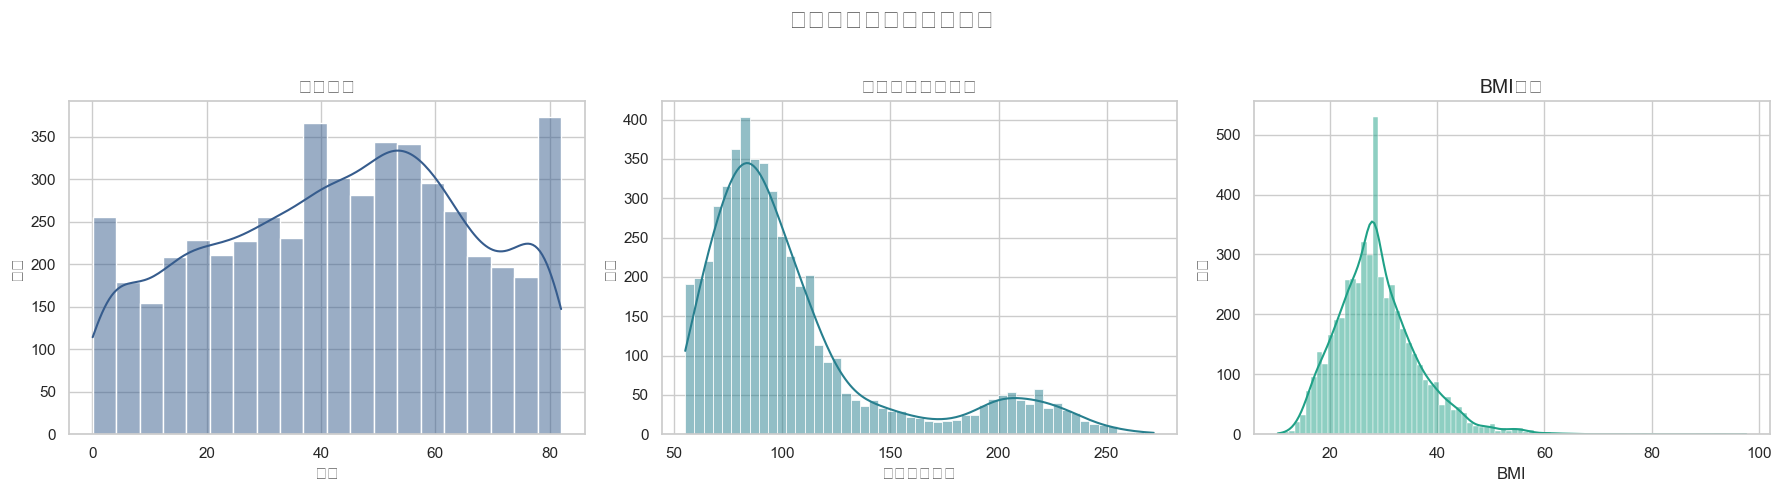

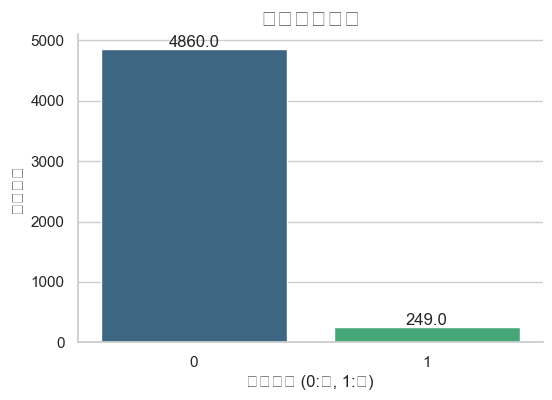

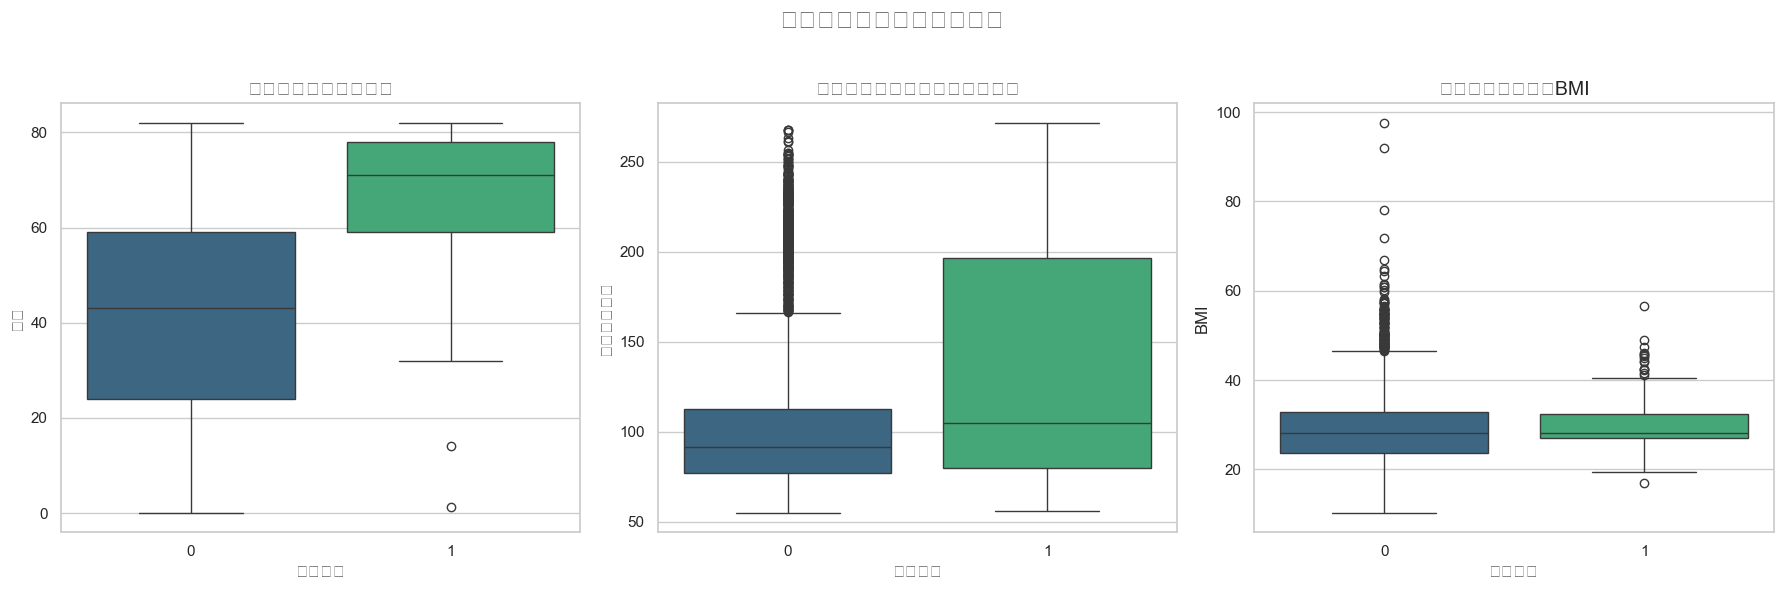

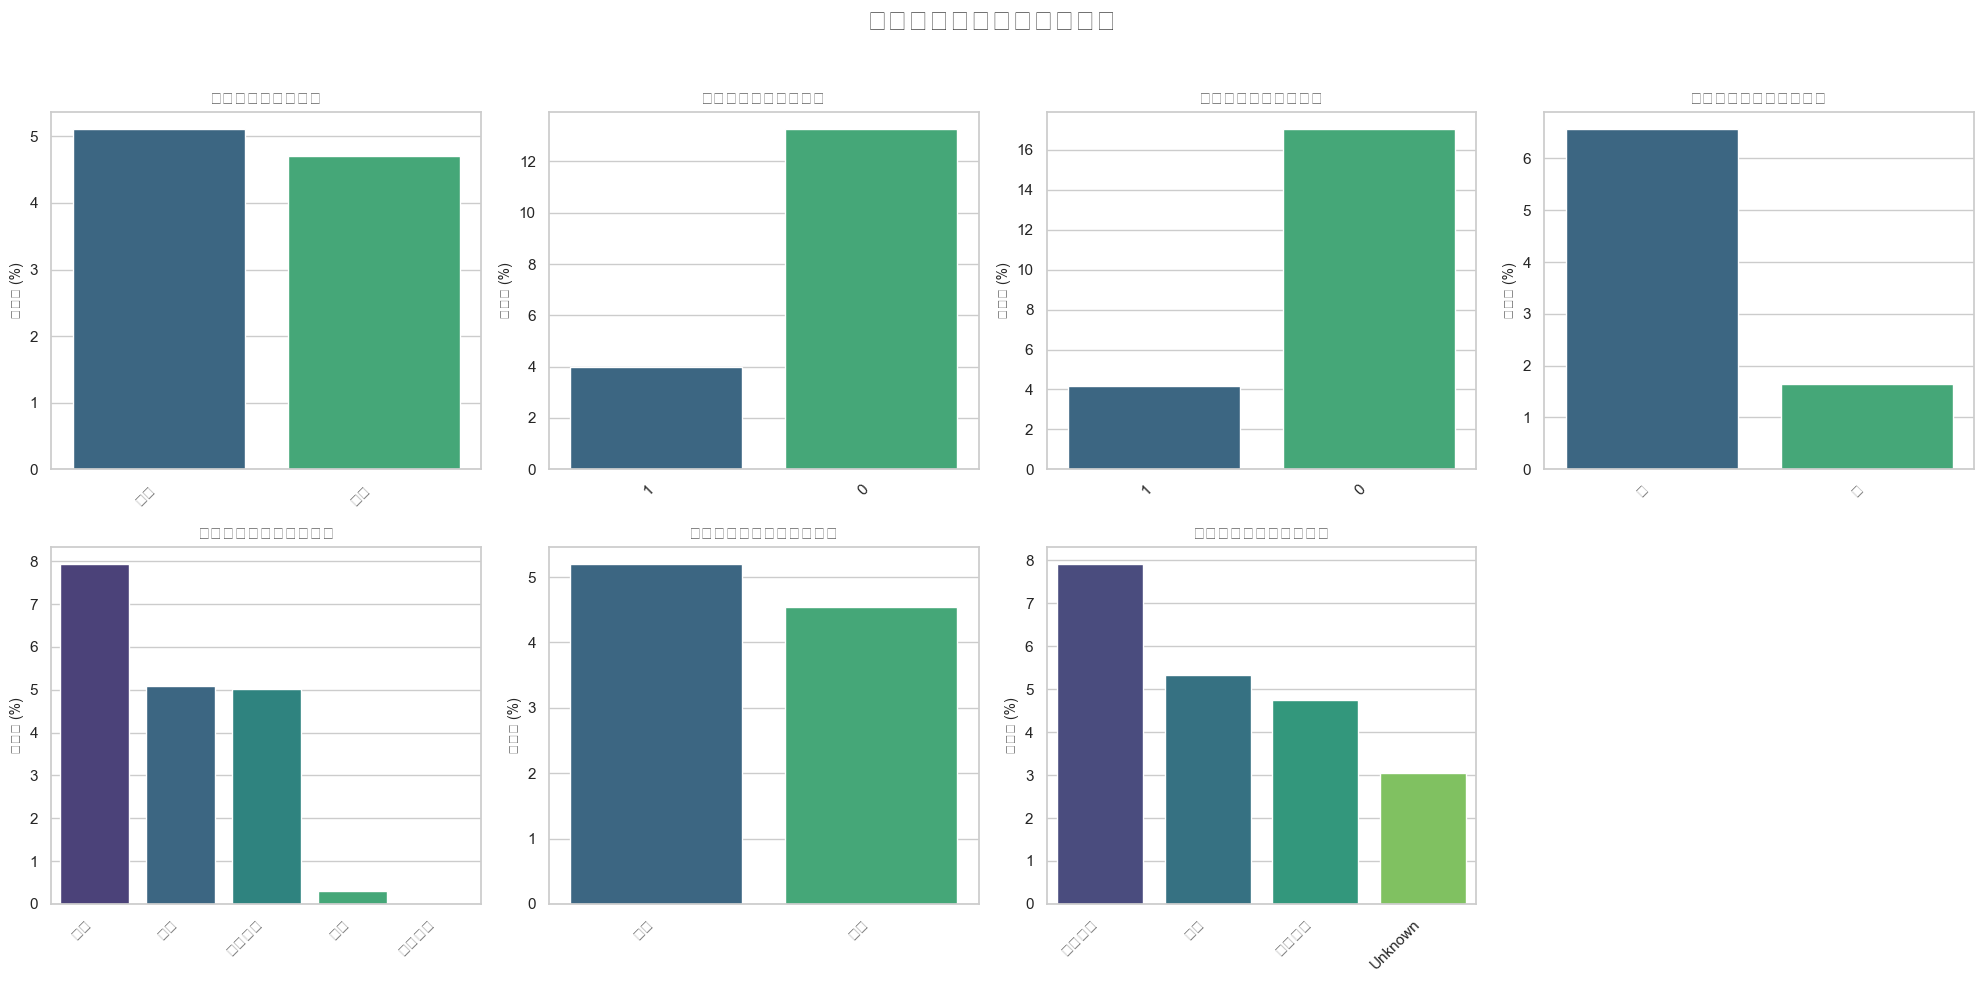

正在生成：多变量分析图表 (相关性热力图)...


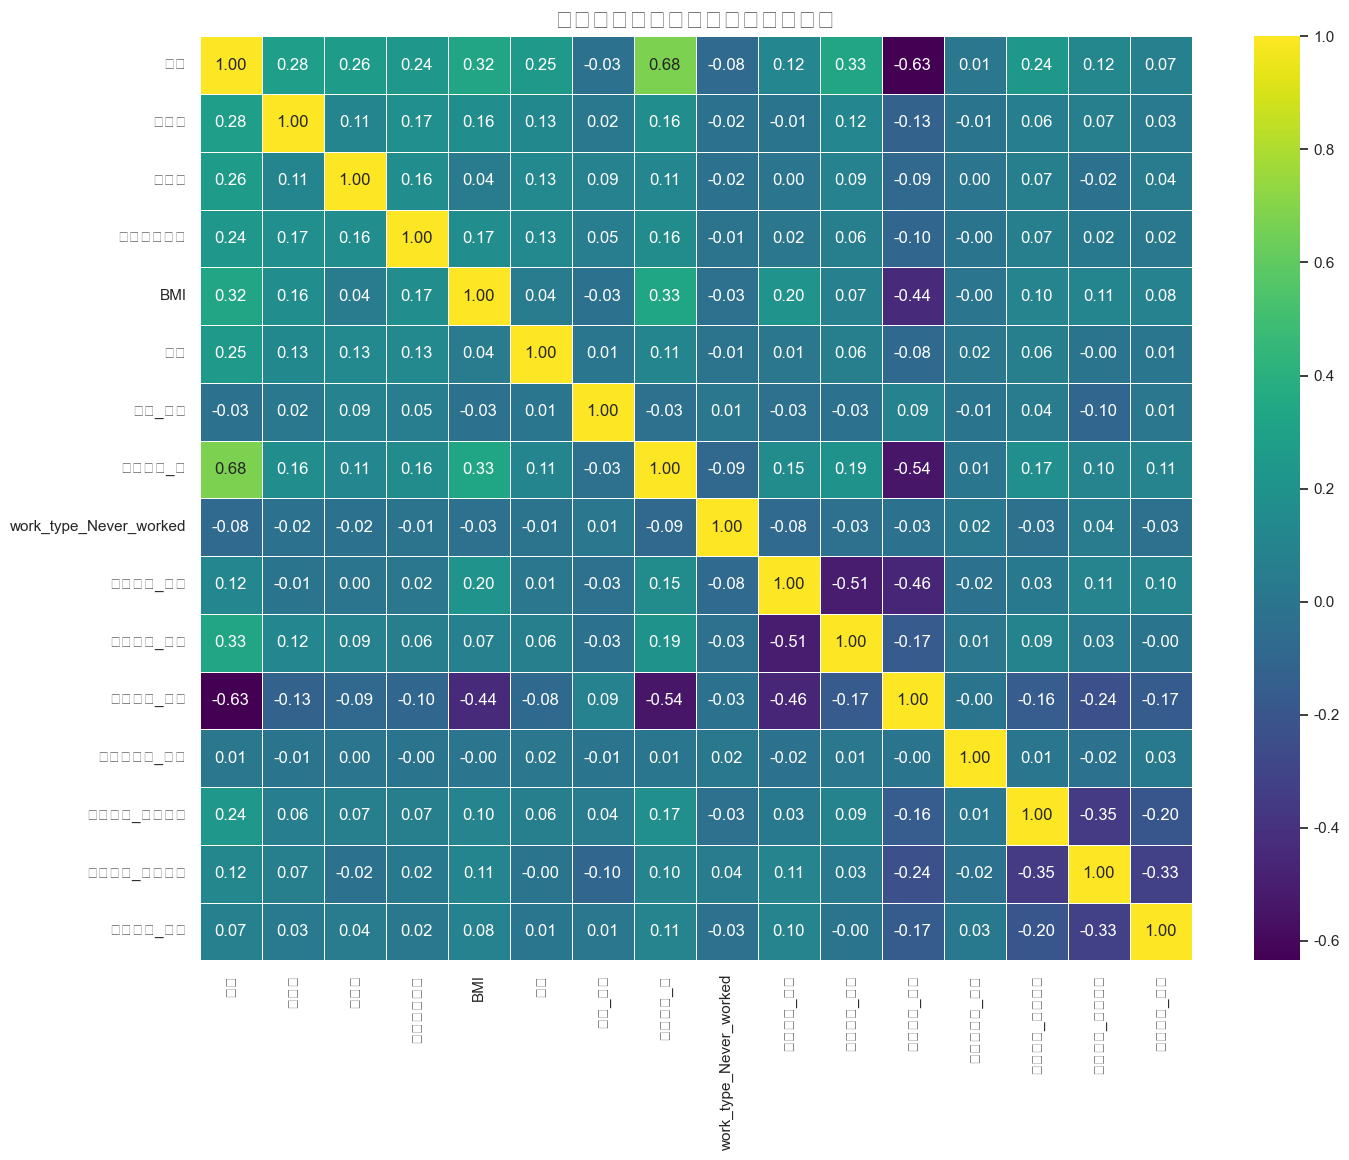


--- [阶段二] 探索性数据分析 (EDA) 完成 ---


In [2]:
# ==============================================================================
# 0. 导入所有需要的库
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import warnings
import matplotlib.font_manager as fm

warnings.filterwarnings('ignore')

# --- 中文字体设置函数 (跨平台兼容性) ---
def set_chinese_font():
    """在系统中查找并设置中文字体，以避免乱码。"""
    if sys.platform == 'win32':
        font_name = 'Microsoft YaHei'
    elif sys.platform == 'darwin':
        font_name = 'PingFang HK'
    else:
        font_name = 'WenQuanYi Micro Hei'
    
    # 检查字体是否可用，并设置
    if font_name in [f.name for f in fm.fontManager.ttflist]:
        plt.rcParams['font.sans-serif'] = [font_name]
        print(f"-> 成功设置中文字体为: {font_name}")
    else:
        print(f"警告: 字体 '{font_name}' 未找到，将使用默认字体。")

    plt.rcParams['axes.unicode_minus'] = False # 解决负号显示为方块的问题

# 调用字体设置函数
set_chinese_font()
print("--- 所有库已成功导入 ---")

# ==============================================================================
# 1. 数据预处理
# ==============================================================================
print("\n--- [阶段一] 开始数据预处理 ---")

data_loaded_successfully = False
df_stroke_processed = None

try:
    df_stroke = pd.read_csv('../data/stroke.csv')
    print(f"成功加载数据，数据集包含 {df_stroke.shape[0]} 行 和 {df_stroke.shape[1]} 列。")

    df_stroke_cleaned = df_stroke.copy()
    df_stroke_cleaned = df_stroke_cleaned[df_stroke_cleaned['gender'] != 'Other']
    df_stroke_cleaned = df_stroke_cleaned.drop('id', axis=1)
    bmi_median = df_stroke_cleaned['bmi'].median()
    df_stroke_cleaned['bmi'].fillna(bmi_median, inplace=True)
    print("数据清洗完成：移除了异常值，删除了id列，填充了bmi缺失值。")

    categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    df_stroke_processed = pd.get_dummies(df_stroke_cleaned, columns=categorical_cols, drop_first=True)
    print("分类变量已转换为独热编码格式。")
    print("--- [阶段一] 数据预处理完成 ---\n")
    
    data_loaded_successfully = True

except FileNotFoundError:
    print("错误: 文件 'data/stroke.csv' 未找到。请确认文件路径是否正确。")
except Exception as e:
    print(f"处理过程中出现错误: {e}")

# ==============================================================================
# 2. 探索性数据分析 (EDA)
# ==============================================================================
if data_loaded_successfully:
    print("\n--- [阶段二] 开始探索性数据分析 (EDA) ---")

    # --- 设置全局配色风格 (学术规范) ---
    sns.set_theme(style="whitegrid")
    sns.set_palette("viridis")
    
    # --- 中文翻译字典 ---
    feature_translation = {
        'age': '年龄', 'avg_glucose_level': '平均血糖水平', 'bmi': 'BMI',
        'gender': '性别', 'hypertension': '高血压', 'heart_disease': '心脏病',
        'ever_married': '婚姻状况', 'work_type': '工作类型', 'Residence_type': '居住地类型',
        'smoking_status': '吸烟状态', 'stroke': '卒中'
    }
    value_translation = {
        'Male': '男性', 'Female': '女性', 'children': '儿童', 'Self-employed': '自雇',
        'Govt_job': '政府工作', 'Private': '私企', 'Never_worked': '从未工作', 
        'Urban': '城市', 'Rural': '乡村', 'formerly smoked': '以前吸烟', 'never smoked': '从不吸烟',
        'smokes': '吸烟', 'No': '否', 'Yes': '是'
    }

    # --- (1) 单变量分析 ---
    numerical_features = ['age', 'avg_glucose_level', 'bmi']
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('中风数据集数值特征分布', fontsize=18, fontweight='bold')
    for i, feature in enumerate(numerical_features):
        sns.histplot(df_stroke_processed[feature], kde=True, ax=axes[i], color=sns.color_palette("viridis")[i+1])
        axes[i].set_title(f'{feature_translation[feature]}分布', fontsize=14)
        axes[i].set_xlabel(feature_translation[feature])
        axes[i].set_ylabel('数量')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x='stroke', data=df_stroke_processed, palette="viridis")
    plt.title('卒中结果分布', fontsize=16, fontweight='bold')
    plt.xlabel('卒中状态 (0:无, 1:有)', fontsize=12)
    plt.ylabel('患者数量', fontsize=12)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    sns.despine()
    plt.show()

    # --- (2) 双变量分析 ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('数值特征与卒中状态的关系', fontsize=18, fontweight='bold')
    for i, feature in enumerate(numerical_features):
        sns.boxplot(x='stroke', y=feature, data=df_stroke_processed, ax=axes[i], palette="viridis")
        axes[i].set_title(f'按卒中状态划分的{feature_translation[feature]}', fontsize=14)
        axes[i].set_xlabel('卒中状态')
        axes[i].set_ylabel(feature_translation[feature])
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    original_categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()
    fig.suptitle('各分类特征下的卒中发生率', fontsize=20, fontweight='bold')
    for i, col in enumerate(original_categorical_cols):
        stroke_rate = df_stroke_cleaned.groupby(col)['stroke'].mean().sort_values(ascending=False) * 100
        sns.barplot(x=stroke_rate.index, y=stroke_rate.values, ax=axes[i], palette='viridis')
        axes[i].set_title(f'按{feature_translation[col]}划分的卒中率', fontsize=12)
        axes[i].set_ylabel('卒中率 (%)', fontsize=10)
        axes[i].set_xlabel('')
        axes[i].set_xticklabels([value_translation.get(label, label) for label in stroke_rate.index], rotation=45, horizontalalignment='right')
    axes[-1].set_visible(False)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # --- (3) 多变量分析 (热力图) ---
    print("正在生成：多变量分析图表 (相关性热力图)...")
    
    # 彻底翻译独热编码后的列名
    translated_cols = {}
    for col in df_stroke_processed.columns:
        if col in feature_translation:
            translated_cols[col] = feature_translation[col]
        elif '_' in col:
            original_col, value = col.rsplit('_', 1)
            translated_original = feature_translation.get(original_col, original_col)
            translated_value = value_translation.get(value, value)
            translated_cols[col] = f'{translated_original}_{translated_value}'
        else:
            translated_cols[col] = col
    
    df_stroke_processed_cn = df_stroke_processed.rename(columns=translated_cols)
    correlation_matrix = df_stroke_processed_cn.corr()
    
    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', linewidths=.5)
    plt.title('卒中数据集所有特征的相关性矩阵', fontsize=18, fontweight='bold')
    plt.show()

    print("\n--- [阶段二] 探索性数据分析 (EDA) 完成 ---")
else:
    print("\n由于数据加载失败，无法进行探索性数据分析。")

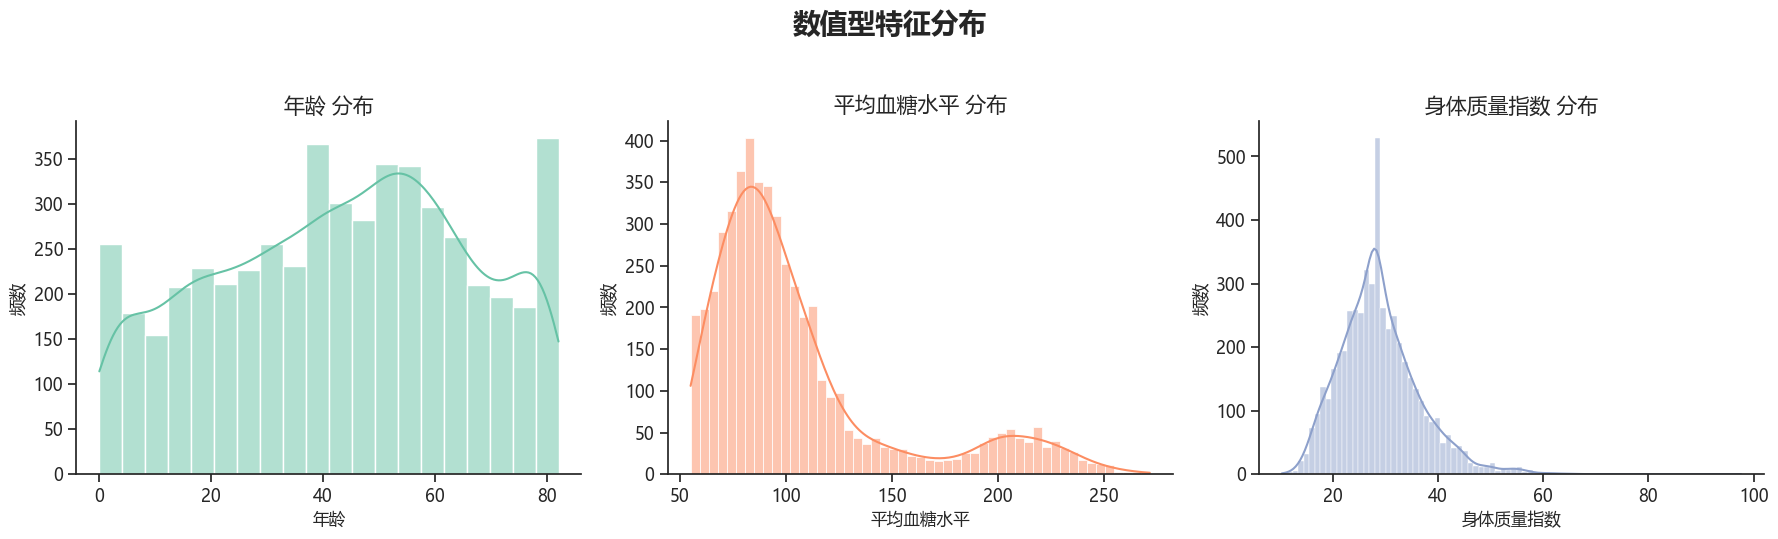

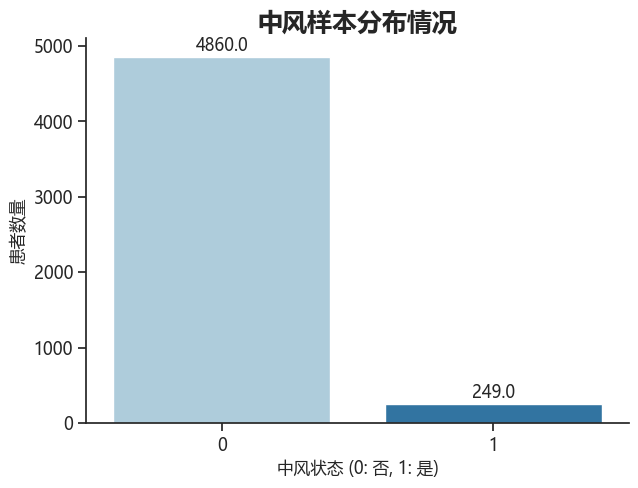

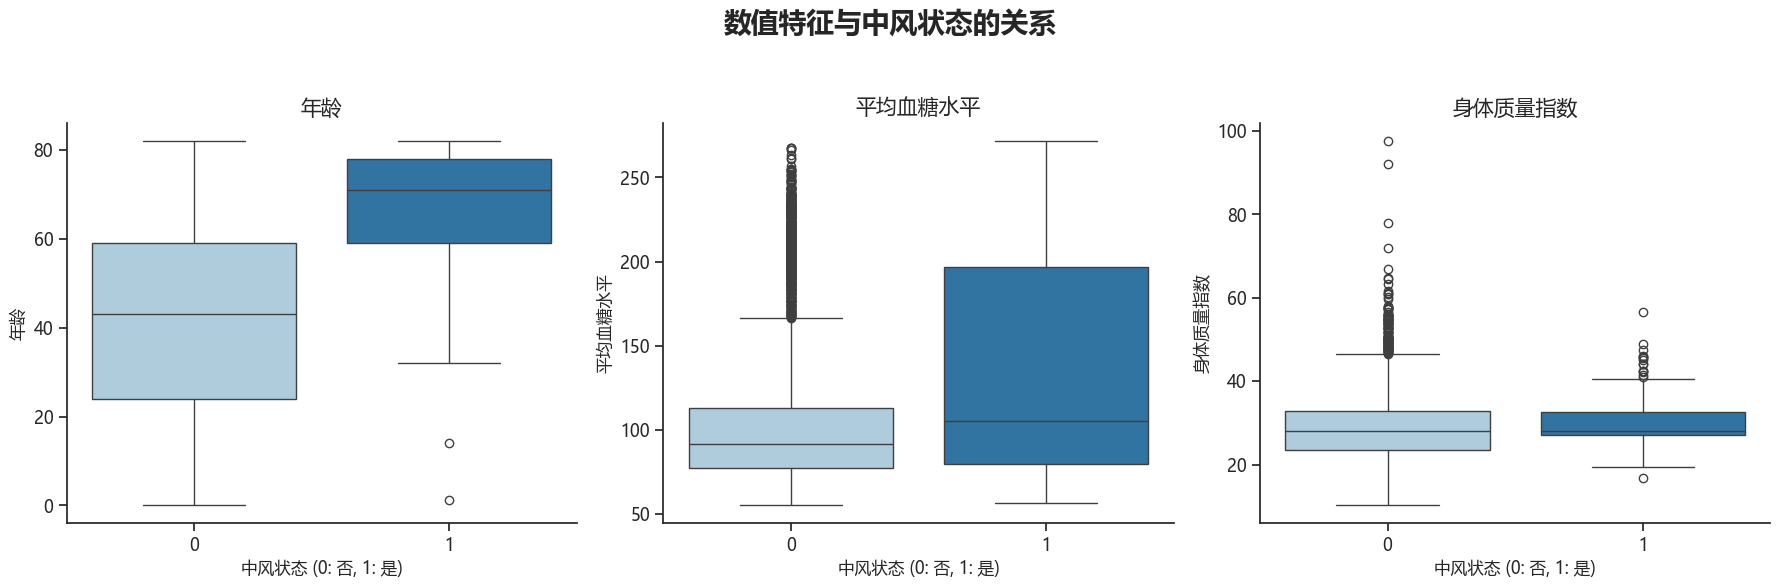

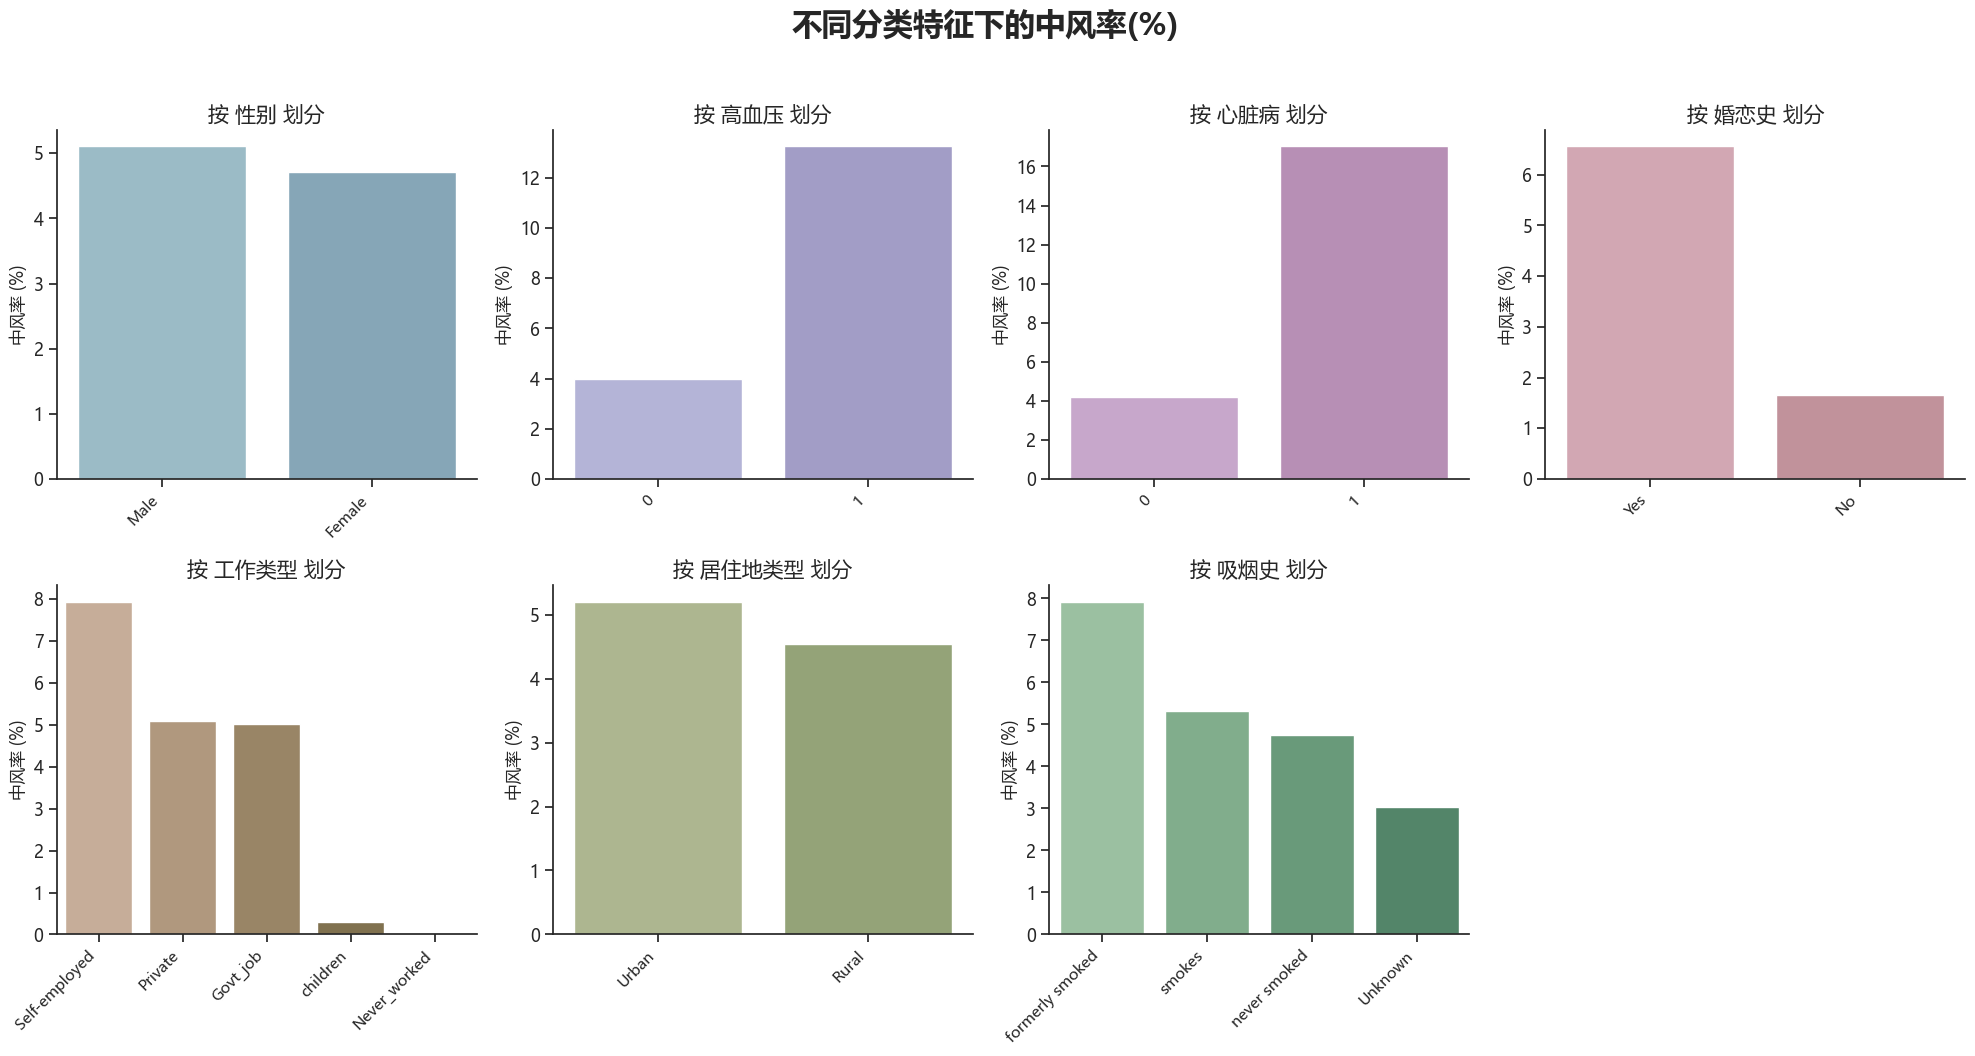

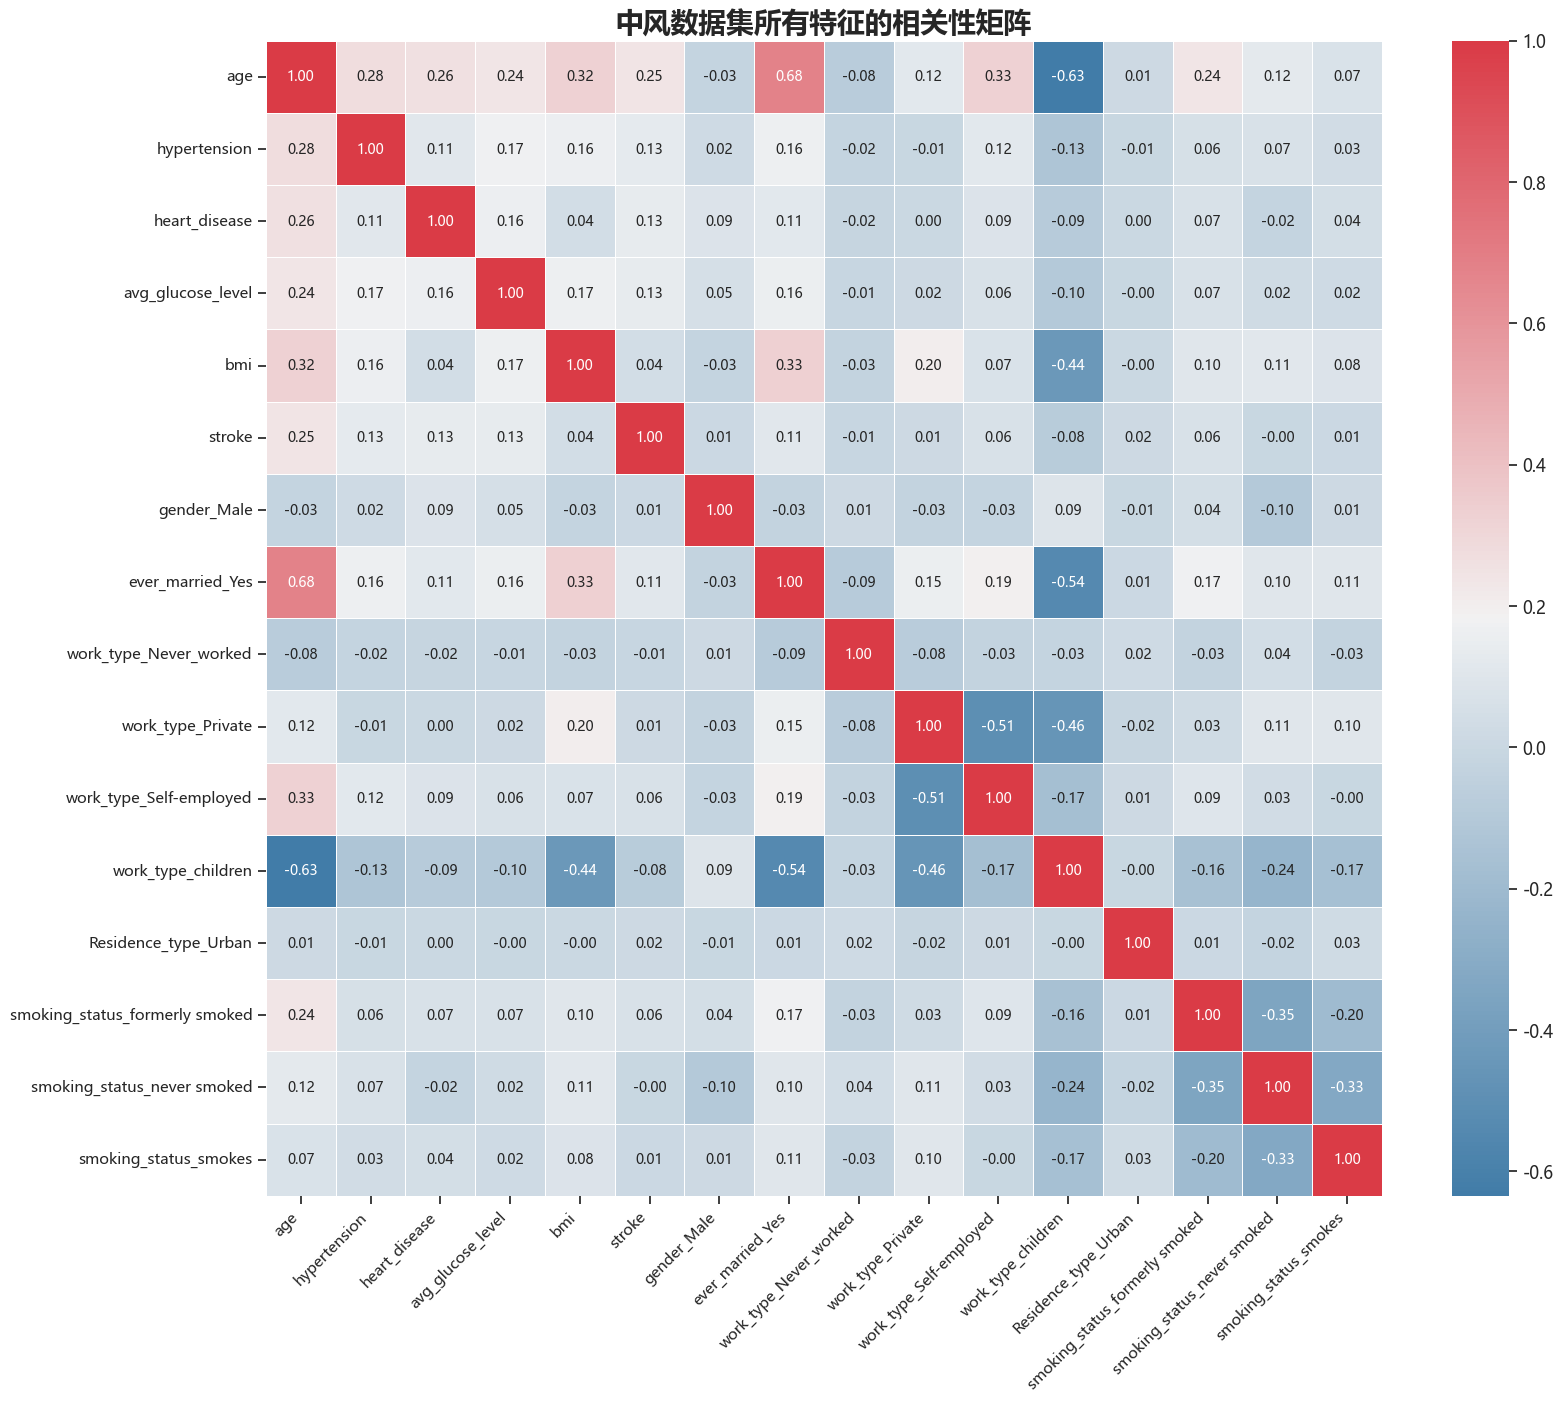

In [3]:
# ==============================================================================
# 0. 导入库与学术化环境设置
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# --- 全局学术化风格设定 ---
# 'style="ticks"' 设定了简洁的刻度风格，是学术图表常用选择
# 'font_scale=1.1' 适度放大字体，保证可读性
sns.set_theme(style="ticks", font_scale=1.1)

# --- 中文字体设置 ---
# 确保图表能正确显示中文，并处理负号显示问题
try:
    if sys.platform.startswith('win'):
        plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    elif sys.platform.startswith('darwin'):
        plt.rcParams['font.sans-serif'] = ['PingFang SC']
    elif sys.platform.startswith('linux'):
        plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
    plt.rcParams['axes.unicode_minus'] = False
except Exception:
    pass

# ==============================================================================
# 1. 数据预处理
# ==============================================================================
data_loaded_successfully = False
try:
    # 加载数据，路径是相对于Jupyter Notebook文件的
    df_stroke = pd.read_csv('../data/stroke.csv')

    # 数据清洗
    df_stroke_cleaned = df_stroke.copy()
    df_stroke_cleaned = df_stroke_cleaned[df_stroke_cleaned['gender'] != 'Other']
    df_stroke_cleaned = df_stroke_cleaned.drop('id', axis=1)
    bmi_median = df_stroke_cleaned['bmi'].median()
    df_stroke_cleaned['bmi'].fillna(bmi_median, inplace=True)

    # 分类变量编码
    categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    df_stroke_processed = pd.get_dummies(df_stroke_cleaned, columns=categorical_cols, drop_first=True)
    
    data_loaded_successfully = True

except FileNotFoundError:
    print("错误: 文件 '../data/stroke.csv' 未找到。请确认文件路径正确。")
except Exception as e:
    print(f"处理过程中出现错误: {e}")

# ==============================================================================
# 2. 探索性数据分析 (EDA)
# ==============================================================================
if data_loaded_successfully:
    
    # --- 准备中文标签映射 ---
    numerical_features_cn = {'age': '年龄', 'avg_glucose_level': '平均血糖水平', 'bmi': '身体质量指数'}
    col_names_cn = {'gender': '性别', 'hypertension': '高血压', 'heart_disease': '心脏病', 'ever_married': '婚恋史', 'work_type': '工作类型', 'Residence_type': '居住地类型', 'smoking_status': '吸烟史'}

    # --- (1) 单变量分析 ---
    numerical_features = ['age', 'avg_glucose_level', 'bmi']
    fig, axes = plt.subplots(1, 3, figsize=(18, 5.5))
    fig.suptitle('数值型特征分布', fontsize=20, fontweight='bold')
    for i, feature in enumerate(numerical_features):
        sns.histplot(df_stroke_processed[feature], kde=True, ax=axes[i], color=sns.color_palette("Set2")[i])
        axes[i].set_title(f'{numerical_features_cn.get(feature, feature)} 分布', fontsize=15)
        axes[i].set_xlabel(numerical_features_cn.get(feature, feature), fontsize=12)
        axes[i].set_ylabel('频数', fontsize=12)
    sns.despine()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    plt.figure(figsize=(7, 5))
    # 使用 'Paired' 调色板，色彩柔和且区分度高
    ax = sns.countplot(x='stroke', data=df_stroke_processed, palette="Paired")
    plt.title('中风样本分布情况', fontsize=18, fontweight='bold')
    plt.xlabel('中风状态 (0: 否, 1: 是)', fontsize=12)
    plt.ylabel('患者数量', fontsize=12)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=12)
    sns.despine()
    plt.show()

    # --- (2) 双变量分析 ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('数值特征与中风状态的关系', fontsize=20, fontweight='bold')
    for i, feature in enumerate(numerical_features):
        sns.boxplot(x='stroke', y=feature, data=df_stroke_processed, ax=axes[i], palette="Paired")
        axes[i].set_title(f'{numerical_features_cn.get(feature, feature)}', fontsize=15)
        axes[i].set_xlabel('中风状态 (0: 否, 1: 是)', fontsize=12)
        axes[i].set_ylabel(numerical_features_cn.get(feature, feature), fontsize=12)
    sns.despine()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    original_categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    fig, axes = plt.subplots(2, 4, figsize=(20, 11))
    axes = axes.flatten()
    fig.suptitle('不同分类特征下的中风率(%)', fontsize=22, fontweight='bold')
    for i, col in enumerate(original_categorical_cols):
        stroke_rate = df_stroke_cleaned.groupby(col)['stroke'].mean().sort_values(ascending=False) * 100
        # 使用 Cubehelix 调色板，生成有变化的颜色，适合多子图展示
        palette = sns.cubehelix_palette(start=i*0.4, rot=-0.2, dark=0.3, light=0.7)
        sns.barplot(x=stroke_rate.index, y=stroke_rate.values, ax=axes[i], palette=palette)
        axes[i].set_title(f'按 {col_names_cn.get(col, col)} 划分', fontsize=15)
        axes[i].set_ylabel('中风率 (%)', fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=11)
    axes[-1].set_visible(False)
    sns.despine()
    plt.tight_layout(rect=[0, 0.02, 1, 0.96])
    plt.show()

    # --- (3) 多变量分析 ---
    correlation_matrix = df_stroke_processed.corr()
    plt.figure(figsize=(18, 15))
    # 创建一个自定义的蓝-白-红发散调色板
    custom_cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=custom_cmap, linewidths=.5, annot_kws={"size": 10})
    plt.title('中风数据集所有特征的相关性矩阵', fontsize=20, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    plt.show()

else:
    pass